In [1]:
import sys

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

from evaluation.deviations_evalaution_metrics import load_results, DeviationEvaluation

In [2]:
# Load deviation prediction results:
path_pred_deviations = "../2_conformance_prediction/results/Helpdesk/deviation_predictions.pkl"

# Evaluation deviation labels

In [3]:
deviation_results_evaluation = load_results(path=path_pred_deviations)
eval = DeviationEvaluation(deviation_results=deviation_results_evaluation)

In [4]:
# Only evaluate labels that are in the target set!
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_dev()
print("Precision macro dev: ", precision_macro)
print("Precision macro dev per label: ", precision_per_label)
print("Recall macro dev: ", recall_macro)
print("Recall macro dev per label: ", recall_per_label)

Precision macro dev:  0.09621975058525398
Precision macro dev per label:  {('>>', 'Assign seriousness'): 0, ('Require upgrade', '>>'): 0.01764705882352941, ('Resolve ticket', '>>'): 0.07731958762886598, ('Take in charge ticket', '>>'): 0.15083798882681565, ('Wait', '>>'): 0.23529411764705882}
Recall macro dev:  0.6212140701528719
Recall macro dev per label:  {('>>', 'Assign seriousness'): 0.0, ('Require upgrade', '>>'): 1.0, ('Resolve ticket', '>>'): 0.8823529411764706, ('Take in charge ticket', '>>'): 0.9310344827586207, ('Wait', '>>'): 0.2926829268292683}


In [5]:
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_no_dev()
print("Precision macro no dev: ", precision_macro)
print("Precision macro per label no dev: ", precision_per_label)
print("Recall macro no dev: ", recall_macro)
print("Recall macro per label no dev: ", recall_per_label)

Precision macro no dev:  0.998064259769969
Precision macro per label no dev:  {('>>', 'Assign seriousness'): 0.9992138364779874, ('Require upgrade', '>>'): 1.0, ('Resolve ticket', '>>'): 0.9995744680851064, ('Take in charge ticket', '>>'): 0.999154334038055, ('Wait', '>>'): 0.9923786602486964}
Recall macro no dev:  0.9575028411912093
Recall macro per label no dev:  {('>>', 'Assign seriousness'): 1.0, ('Require upgrade', '>>'): 0.9342778433687524, ('Resolve ticket', '>>'): 0.9291930379746836, ('Take in charge ticket', '>>'): 0.9395626242544731, ('Wait', '>>'): 0.9844807003581377}


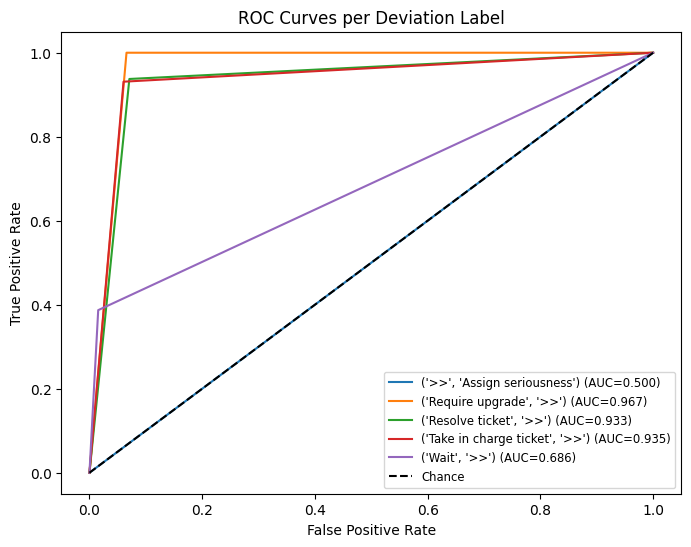

ROC_AUC macro dev per label:  {'per_label_auc': [0.5, 0.9671389216843762, 0.9333465189873418, 0.9352985535065469, 0.6857887372758431], 'macro_auc': 0.8043145462908216}


In [6]:
roc_auc = eval.plot_macro_roc_auc()
print("ROC_AUC macro dev per label: ",roc_auc)

# Evaluation sequences

In [8]:
# Evaluation of the 

tgt_suff_dev_pos, pred_suff_dev_pos, real_tgt_suffixes, real_pred_suffix_samples = eval.get_suffix_devs()

case_level, per_label_mean, weighted_macro = eval.likelihood_at_target_positions(tgt_suff_dev_poss=tgt_suff_dev_pos, pred_suff_dev_poss=pred_suff_dev_pos)

print("likelihood at correct position in suffix for all deviations: ", per_label_mean)
print("mean likelihood of deviations' correct poistion across all deviations: ", weighted_macro)

likelihood at correct position in suffix for all deviations:  {'Assign seriousness': 0.0, 'Require upgrade': 0.3333333333333333, 'Resolve ticket': 0.32545454545454544, 'Take in charge ticket': 0.7724137931034482, 'Wait': 0.14238095238095239}
mean likelihood of deviations' correct poistion across all deviations:  0.3680733944954128


/home/PSPLab/ProbabilisticSuffixPredictionLab/risk_controlled_proactive_conformance_checking_dev/src/notebooks/evaluation/../../evaluation/deviations_evalaution_metrics.py:646: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


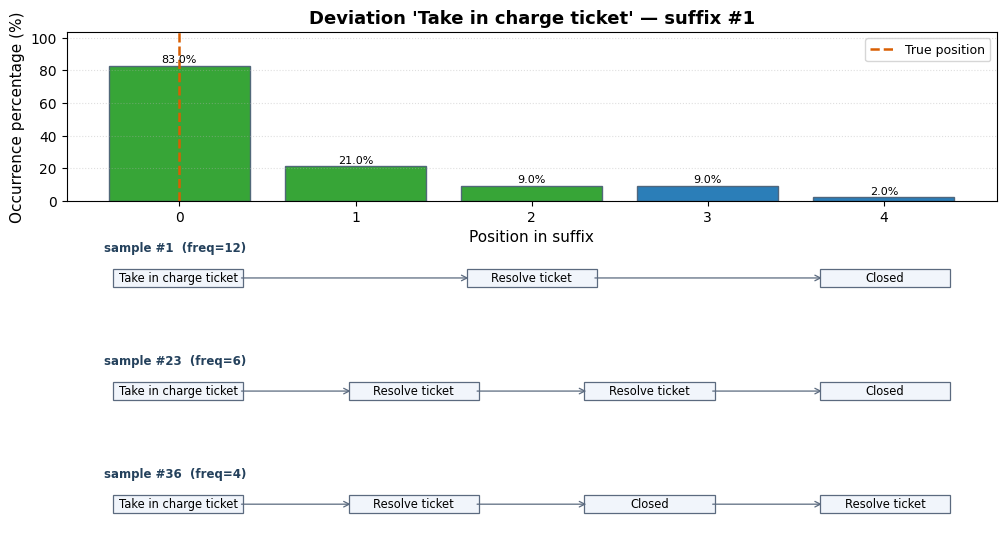

Samples placing 'Take in charge ticket' at position 0: [0, 1, 3, 4, 7, 10, 11, 12, 14, 16, 19, 23, 25, 26, 33, 34, 36, 39, 41, 42, 44, 46, 47, 51, 52, 54, 56, 57, 61, 62, 63, 64, 65, 66, 68, 69, 78, 79, 80, 81, 82, 85, 88, 90, 91, 93, 94, 95, 99]


In [9]:
eval.plot_suffix_deviation_distribution(suffix_index=1,
                                        label='Take in charge ticket',
                                        tgt_suff_dev_poss=tgt_suff_dev_pos,
                                        pred_suff_dev_poss=pred_suff_dev_pos,
                                        pred_suffix_samples=real_pred_suffix_samples)

# Evaluation unseen deviation labels